In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [223]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [224]:
# We definitely don't need customerID
telcom = telcom.drop("customerID", axis=1)

In [225]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [226]:
telcom = telcom[telcom['TotalCharges'] != ' ']
telcom.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

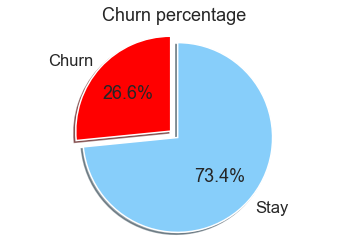

In [227]:
# Churn percentage

labels = 'Churn', 'Stay'
Churn = len(telcom[telcom['Churn'] == 'Yes'])
Stay = len(telcom[telcom['Churn'] == 'No'])
sizes = [Churn, Stay]
colors = ['red', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn percentage')
plt.show()

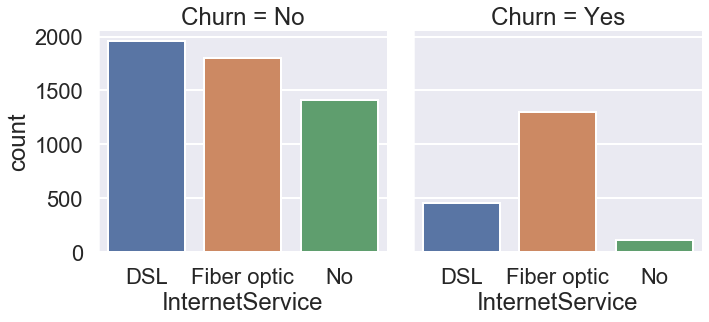

In [228]:
sns.set_context("poster")
sns.catplot(x="InternetService", data=telcom, kind="count", col="Churn")

# Show plot
plt.show()

# The proportion of churners with a 'Fiber optic' internet connection is high

<font size=5>
Many of our company's churners are paying for the 'Fiber Optic'. Let's check the percentage.
</font>

In [229]:
churners_nr = len(telcom[telcom['Churn'] == 'Yes'])
churners_fiber_nr = len(telcom[(telcom['InternetService'] == 'Fiber optic') & (telcom['Churn'] == 'Yes')])
print("The percentage of 'churners' with the fiber optic service is " + str(round((churners_fiber_nr/churners_nr)*100, 1)) + "%")

The percentage of 'churners' with the fiber optic service is 69.4%


<font size=5>
We should investigate more on this. More than two users out of three leaving our company, 
subscribed to the most expensive service. It seems they are not satisfied!
</font>

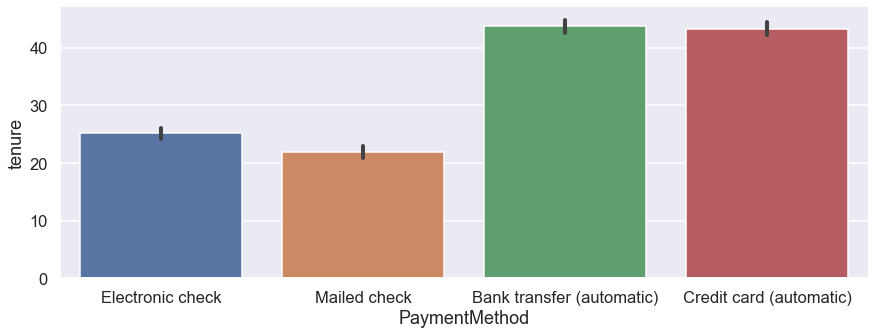

In [230]:
sns.set_context("talk")

sns.catplot(x="PaymentMethod", y="tenure", data=telcom, kind="bar", aspect=2.5)
plt.show()

In [234]:
electronic_check_nr = len(telcom[(telcom['PaymentMethod']=='Electronic check')&(telcom['Churn']=='Yes')])
mailed_check_nr = len(telcom[(telcom['PaymentMethod']=='Mailed check')&(telcom['Churn']=='Yes')])
bank_transfer_nr = len(telcom[(telcom['PaymentMethod']=='Bank transfer (automatic)')&(telcom['Churn']=='Yes')])
credit_card_nr = len(telcom[(telcom['PaymentMethod']=='Credit card (automatic)')&(telcom['Churn']=='Yes')])
print("The percentage of 'churners' with electronic check payment is " + str(round((electronic_check_nr/churners_nr)*100, 1)) + "%")
print("The percentage of 'churners' with mailed check payment is " + str(round((mailed_check_nr/churners_nr)*100, 1)) + "%")
print("The percentage of 'churners' with bank transfer payment is " + str(round((bank_transfer_nr/churners_nr)*100, 1)) + "%")
print("The percentage of 'churners' with credit card payment is " + str(round((credit_card_nr/churners_nr)*100, 1)) + "%")

The percentage of 'churners' with electronic check payment is 57.3%
The percentage of 'churners' with mailed check payment is 16.5%
The percentage of 'churners' with bank transfer payment is 13.8%
The percentage of 'churners' with credit card payment is 12.4%


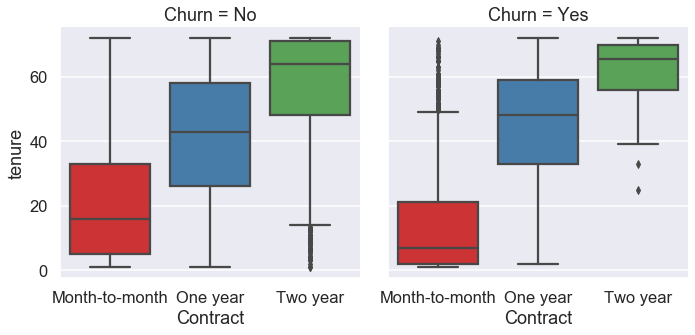

In [231]:
# Set palette to 'Set1'
sns.set_palette("Set1")

# Specify the category ordering
contract_order = ['Month-to-month', 'One year', 'Two year']

# Create a box plot and set the order of the categories
sns.catplot(x="Contract", y="tenure", data=telcom, kind="box", order=contract_order, col="Churn")

# Show plot
plt.show()

In [233]:
monthly_churners_nr = len(telcom[(telcom['Contract']=='Month-to-month')&(telcom['Churn']=='Yes')])
print("The percentage of 'churners' with contract month-to-month is " + str(round((monthly_churners_nr/churners_nr)*100, 1)) + "%")

The percentage of 'churners' with contract month-to-month is 88.6%


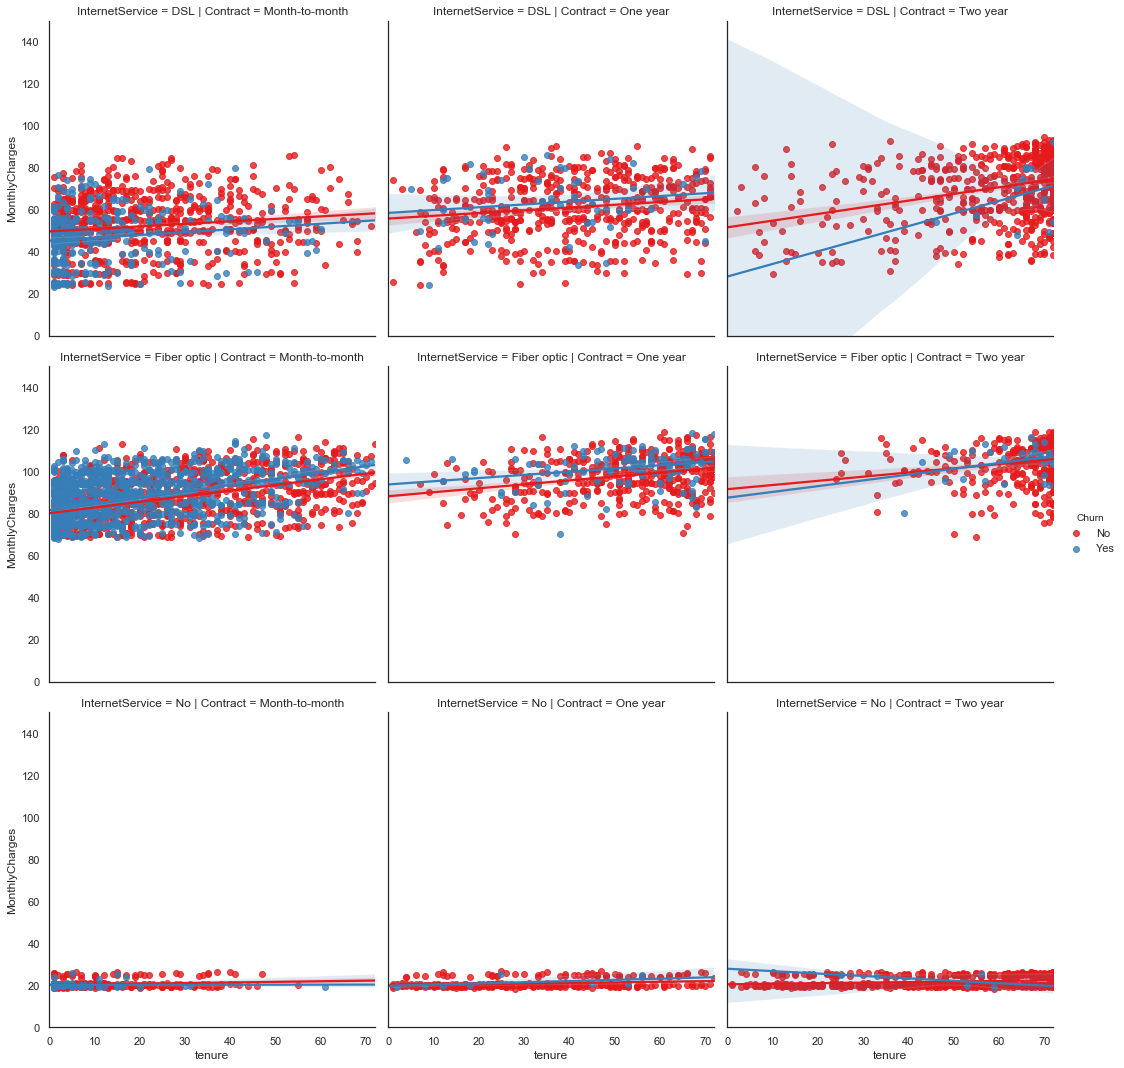

In [195]:
sns.set_context("notebook")
sns.set_style('white')

# Create a regression plot using hue
g = sns.lmplot(data=telcom, x="tenure", y="MonthlyCharges", hue="Churn", col="Contract", row="InternetService")
g = g.set(xlim=(0, 72), ylim=(0, 150))

# Show the results
plt.show()

<font size=5>
Users paying with bank transfers, credit cards or mailed check show a greater loyalty to our service.
The same for customers chosing to pay year by year, or even better every two years.
</font>

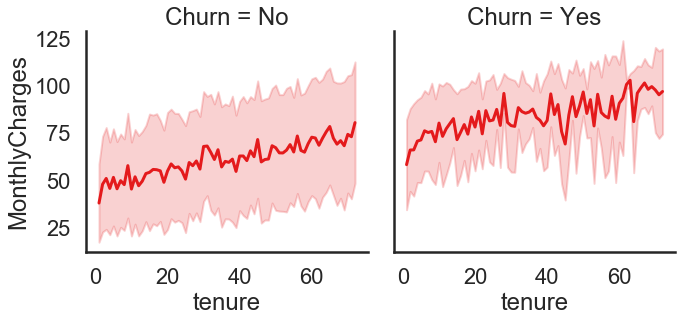

In [196]:
sns.set_context("poster")
sns.relplot(x="tenure", y="MonthlyCharges", 
            data=telcom, kind="line", ci="sd", col="Churn")
plt.show()

<font size=5>
<i>Churners</i> pay more, and this is compatible with what we know about customers of the 'fiber optic'
service who leaves more frequently.
</font>   

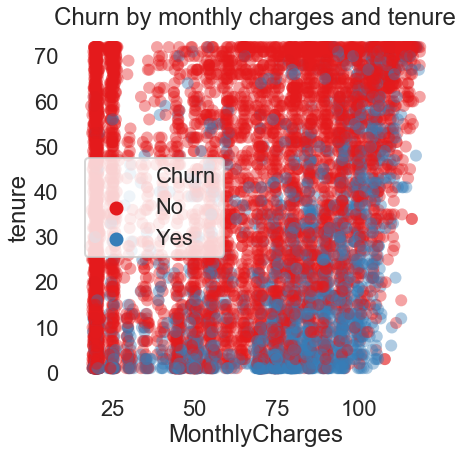

In [197]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="MonthlyCharges", y="tenure",
                hue="Churn", sizes=(1, 8), linewidth=0,
                data=telcom, ax=ax, alpha=0.4).set_title("Churn by monthly charges and tenure")
plt.show()

<font size=5>
Many customers leave after a short time. Usually they are among the ones who pay more.
We should do some benchmarking to check if the same happens to our competitors.
</font>

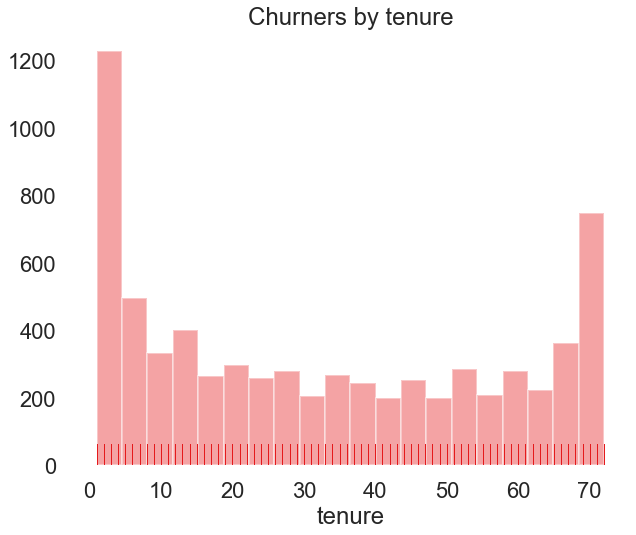

In [198]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(10, 8))
sns.despine(left=True, bottom=True, ax=ax)
sns.distplot(telcom["tenure"], kde=False, rug=True, bins=20, ax=ax).set_title("Churners by tenure")
plt.show()

In [200]:
#set up bins
bin = [-1,12,24,36,48,60,72]
#use pd.cut function can attribute the values into its specific bins
range = pd.cut(telcom.tenure, bin)
range = range.to_frame()
range.columns = ['tenure_group']
range['tenure_group'] = range['tenure_group'].astype(str)
range = range.replace(['(-1, 12]', '(12, 24]', '(24, 36]', '(36, 48]', '(48, 60]', '(60, 72]'], 
                      ['tenure < 1 year', 'tenure < 2 years', 'tenure < 3 years', 'tenure < 4 years', 
                       'tenure < 5 years', 'tenure < 6 years'])
telcom = pd.concat([telcom,range],axis = 1)
telcom.drop(columns='tenure', axis=1, inplace=True)
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,tenure < 1 year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,tenure < 3 years
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,tenure < 1 year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,tenure < 4 years
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,tenure < 1 year


In [201]:
churn = telcom[telcom['Churn']=='Yes']
not_churn = telcom[telcom['Churn']=='No']

In [202]:
not_churn["tenure_group"].value_counts().reset_index().sort_index()

,index,tenure_group
0,tenure < 6 years,1314
1,tenure < 1 year,1138
2,tenure < 2 years,730
3,tenure < 5 years,712
4,tenure < 3 years,652
5,tenure < 4 years,617


In [203]:
#customer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().sort_index().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().sort_index().reset_index()
tg_nch.columns = ["tenure_group","count"]

In [204]:
tg_nch.sort_values(by=['tenure_group'])

,tenure_group,count
0,tenure < 1 year,1138
1,tenure < 2 years,730
2,tenure < 3 years,652
3,tenure < 4 years,617
4,tenure < 5 years,712
5,tenure < 6 years,1314


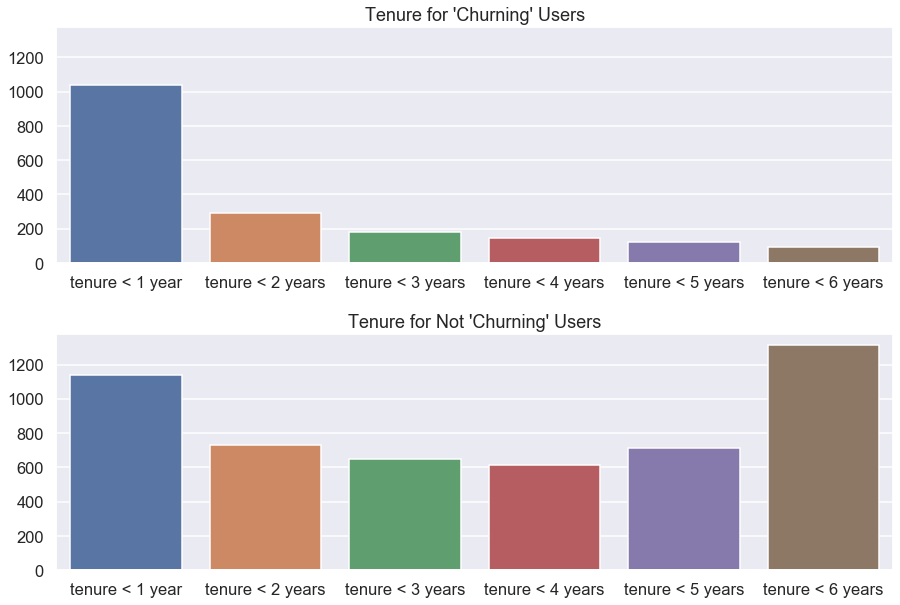

In [205]:
sns.set_context("talk")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True)
fig.set_size_inches(15, 10)
plt.subplots_adjust(hspace=0.3)

# Plot the distribution of barplot for churning users
sns.barplot(x=tg_ch['tenure_group'], y=tg_ch['count'], ax=ax1)

# Modify the properties of the plot
ax1.set(xlabel="",
       ylabel="",
       title="Tenure for 'Churning' Users")

# Plot the distribution of barplot for not churning users
sns.barplot(x=tg_nch['tenure_group'], y=tg_nch['count'], ax=ax2)

# Modify the properties of the plot
ax2.set(xlabel="",
       ylabel="",
       title="Tenure for Not 'Churning' Users")

# Display the plot
plt.show()

<font size=5>
This analysis shows us clearly how many churners are using our service for <u>less than one year</u>.
</font>

In [206]:
one_year = len(telcom[(telcom['tenure_group'] == 'tenure < 1 year') & (telcom['Churn'] == 'Yes')])
print("The percentage of 'churners' with tenure less than one year is " + str(round((one_year/churners_nr)*100, 1)) + "%")

The percentage of 'churners' with tenure less than one year is 55.5%


## Machine Learning

<font size=5>
I loved the following approach, that was followed in the <a href="https://www.kaggle.com/nilanml/telecom-customer-churn-voting-80-1-accuracy">kernel</a> published by Nilan, a student
at IEM Kolkata, in India. He analyzed the results from many classifiers, used the best three
with VotingClassifier from sklearn.ensemble and got a result better than those three.
</font>

In [207]:
# First, we encode the matrix in numerical form
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [208]:
telcom = telcom.apply(lambda x: object_to_int(x))
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2504,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1465,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,156,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1399,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,924,1,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [209]:
X = df.drop('Churn', 1)
y = df['Churn']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7075829383886256
RandomForest : 0.7635071090047393
Naive Bayes : 0.7398104265402844
KNeighbours : 0.7587677725118483
SVM : 0.7677725118483413
Neural Network : 0.7739336492890996
LogisticRegression : 0.7966824644549763
ExtraTreesClassifier : 0.7597156398104266
AdaBoostClassifier : 0.7843601895734598
GradientBoostingClassifier:  0.7900473933649289
XGB : 0.795734597156398
CatBoost : 0.79478672985782


<font size=5>
The three best are GradientBoosting, LogisticRegression and XGBClassifier. All three of them
get a score over 79.5%. Now, as already said, we use them as bricks for our VotingClassifier.
</font>

In [213]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("The accuracy with this ensemble method is " + str(round(accuracy_score(y_test, predictions)*100,2)) + "%")

The accuracy with this ensemble method is 80.19%


In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

In [215]:
cm

array([[1392,  165],
       [ 253,  300]])

<font size=5>
The accuracy that we reach with VotingClassifier is 80.19%, meaning approximately 4 out of 5
predictions are right. Considering that the Churn percentage is 26.6% and that now we have 19.8%
of mistakes, we gained a 6.8% of correct predictions - our comparison is with the dumb classifier
that says that no user will ever <i>churn</i>.
</font>

<font size=5>
This analysis has shown that users cancel the service:<br>
<ul>
    <li>in the first year - 55.5%</li>
    <li>if they pay with electronic check - 57.3%</li>
    <li>fiber optic internet - 69.8%</li>
    <li>if they pay month-to-month - 88.6%</li>
</ul>
</font>